# Decision Tree Classifier using CART and Gini Impurity

## Step 1: Import necessary libraries

* `pandas` is used for data manipulation and analysis, especially for handling tabular data (like DataFrames). It is imported and given the alias `pd`

* The `load_iris` function is imported from `scikit-learn`’s datasets module. `load_iris` will be used to load the **"Iris dataset"** that can be used as a classification example.

* The `DecisionTreeClassifier` class and the `plot_tree` function from scikit-learn’s tree module are then imported. The `DecisionTreeClassifier` is used to create and train a decision tree model and the `plot_tree` function is used to visualize the decision tree.

* The `train_test_split` function from scikit-learn’s model_selection module is also imported. It is used to split the dataset into training and testing sets, which is necessary for evaluating model performance.

* The `classification_report` and `accuracy_score` from scikit-learn’s metrics module are also imported. They are used to evaluate the performance of the classifier. `classification_report` gives detailed metrics (precision, recall, f1-score), and `accuracy_score` gives the overall accuracy.

* The matplotlib plotting library is imported and given the alias `plt`. Matplotlib is used for creating visualizations, such as plotting the decision tree.

In [26]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

## Step 2: Load and Explore the Data

`iris = load_iris()`
* Loads the Iris dataset into the variable called `iris`. The Iris dataset is a classic dataset for classification tasks, containing features and labels for different iris flower species.

`X = pd.DataFrame(iris.data, columns=iris.feature_names)`
* Converts the feature data from the Iris dataset into a pandas DataFrame, with column names set to the feature names. This makes it easier to view, manipulate, and analyze the feature data in a tabular format.

`y = pd.Series(iris.target)`
- Converts the target labels (species) from the Iris dataset into a pandas Series. This provides a convenient format for handling the target variable during model training and evaluation.

`print("Feature data:")`
`print(X.head())`
* Prints the string "Feature data:" using the `print()` function and then uses `head()` to print the first five rows of the feature DataFrame that was named `X`. This allows you to quickly inspect the structure and values of the feature data.

`print("\nTarget labels:")`
`print(y.head())`
* Prints the string "Feature data:" using the `print()` function and then uses `head()` to print the first five rows of the feature DataFrame that was named `X`. This allows you to quickly inspect the structure and values of the first few target labels to confirm that the data was loaded correctly.

In [21]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

print("Feature data:")
print(X.head())

print("\nTarget labels:")
print(y.head())

# To display all the rows and columns in the DataFrame
# display(pd.concat([X, y.rename('target')], axis=1))


Feature data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target labels:
0    0
1    0
2    0
3    0
4    0
dtype: int64


## Step 3: Split the data into training and testing sets

- `train_test_split` is a function from scikit-learn that splits your dataset into two parts: one for training the model and one for testing it.
- `X` is your feature data (inputs), and `y` is your target data (outputs/labels).
- `test_size=0.3` means 30% of the data will be used for testing, and the remaining 70% for training.
- `random_state=53` sets a seed for the random number generator, ensuring that the split is reproducible (you get the same split every time you run the code).

- The `train_test_split` function returns four objects:
  - `X_train`: features for training
  - `X_test`: features for testing
  - `y_train`: labels for training
  - `y_test`: labels for testing

**Why:**  
Splitting the data this way allows you to train your model on one part of the data and evaluate its performance on unseen data, which helps prevent overfitting and gives a realistic measure of model accuracy.

Analogy: This is similar to how a student learning a subject is not exposed to only one past paper that they then memorize. If they memorize the past paper and the exam assesses them on a different set of questions, then their performance in the exam will not be the same as their performance in the memorized past paper.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=53
)

## Step 4: Create and Train the CART Decision Tree

**Explanation:**

- `clf = DecisionTreeClassifier(criterion="gini", random_state=42)`
  - This creates an instance of a decision tree classifier using the CART algorithm.
  - **criterion="gini"**: Specifies that the tree should use the Gini impurity measure to decide splits (the default for CART).
  - **random_state=53**: Ensures reproducibility by setting the random seed.

- `clf.fit(X_train, y_train)`
  - This trains (fits) the decision tree classifier on the training data (`X_train` for features, `y_train` for labels).
  - This step therefore builds the decision tree model so it can learn patterns from the training data and later make predictions on new, unseen data.

In [23]:
# Using Gini impurity by default
clf = DecisionTreeClassifier(criterion="gini", random_state=53)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=53)

## Step 5: Evaluate the Model

`y_pred = clf.predict(X_test)`

- This uses the trained decision tree classifier (`clf`) to predict the labels for the test set features (`X_test`). This gives you the model’s predictions on data it has not seen before, which is necessary for evaluating its performance.

`print("Classification Report:\n", classification_report(y_test, y_pred))`
- This prints a detailed classification report comparing the true labels (`y_test`) to the predicted labels (`y_pred`). The report includes precision, recall, f1-score, and support for each class, helping you understand how well the model performs for each category.

`print("Accuracy:", accuracy_score(y_test, y_pred))`
- Prints the overall accuracy of the model, which is the proportion of correct predictions out of all predictions.

In [24]:
y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.89      0.94        18
           2       0.89      1.00      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Accuracy: 0.9555555555555556


## Step 6: Visualize the Decision Tree

`plt.figure(figsize=(12, 8))`
This creates a new matplotlib figure with a size of 12 inches by 8 inches to ensure that the decision tree plot is large and readable.

`plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)`
- Plots the trained decision tree (`clf`).
    - `feature_names=iris.feature_names`: Labels the tree’s nodes with the feature names.
    - `class_names=iris.target_names`: Labels the leaves with the class names.
    - `filled=True`: Colors the nodes based on the class for better visualization.
- This visually shows how the decision tree splits the data and makes decisions.

`plt.title("A Decision Tree Classifier using Gini Impurity (CART)")`
- Sets the title of the plot to provide context for the visualization.

`plt.show()`
- This is used to display the plot in the notebook.

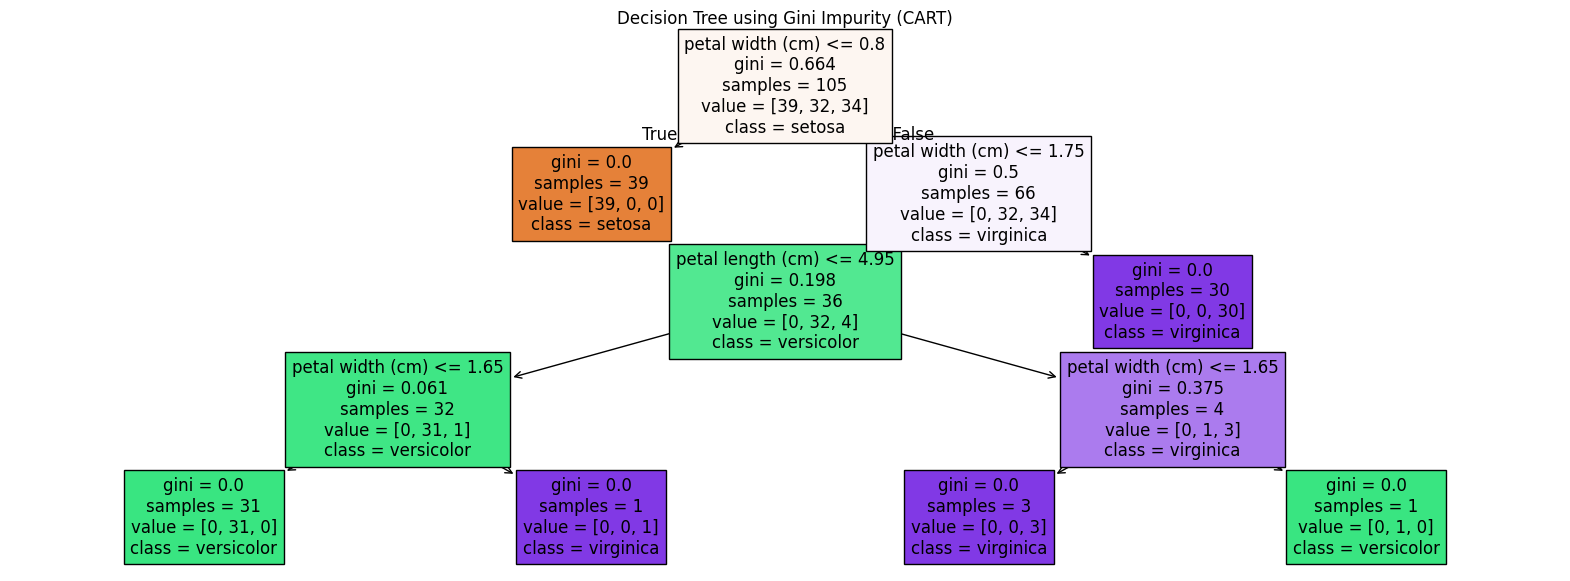

In [25]:
plt.figure(figsize=(20, 7))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree using Gini Impurity (CART)")
plt.show()